# Application of Random Forest to Bike Weather - an unbalanced dataset

**Notebook 3 of 3**

In this tutorial we will look at how Random Forest classifiers can improce predictions on noisy datasets. The example we will use is the cleaned dataset from the Linear Regression tutorial.

Linear regression is a widely used and intuitive technique for modeling relationships between variables. However, its assumptions of linearity are often violated in real world datasets that contain noise, anomalies or complex nonlinear patterns. As a result, linear regression can struggle to make accurate predictions when faced with noisy data where the signal is obscured. The model ends up overly fitting the noise rather than the underlying structure.

In this tutorial, we will demonstrate how random forests can outperform linear regression on noisy datasets. Random forests are an ensemble method that averages the predictions of multiple decision trees to arrive at more robust and generalized solutions.

We will use the cleaned dataset from the Linear Regression tutorial. To generate that dataset many anomailes such as unusual data points that don't follow the overall pattern and missing/incorrect values had to be corrected using assumptions.  Those anomalies introduce noise in the dataset.

By the end of this tutorial, you should understand how random forests harness randomness and averaging to overcome issues like noise that affect traditional linear models and deliver superior predictive performance.

We have already downloaded the datasets and you can find them in the tutorial repository.

# Learning objectives
Average time to complete 30min

By the end of this tutorial you should be able to:
* Clean your data and describe why this is important for machine learning.
* Filling out the missing data, if needed.
* Visualize and analyze data to ensure it meets RDM best practices.
* Make the random forest classifer 
* Make prediction with the random forest classifier.
* Analyze the features to further improve the model.

## What you will need for this tutorial

* See the [introduction document](https://uottawa-it-research-teaching.github.io/machinelearning/) for general requirements and how Jupyter notebooks work.
* We'll need Pandas for convenient data handling. It's a very powerful Python package that can read CSV and Excel files. It also has very good data manipulation capabilities which come in use for data cleaning.
* We will use scikit learn as our machine learning package.
* numpy 
* seaborn 
* matplotlib
* requests
* ipywidgets
* The data files that should have come with this notebook.

## RDM best practices

Good data handling for machine learning begins with good Research Data Managment (RDM). The quality of your source data will impact the outcome of your results, just like the reproducibility of your results will depend on the quality of your data sources, in addition to how you organize the data so that other people (and machines!) can understand and reuse it.

We also need to respect a few research data management best practices along the way, these best practices are recommended by the Digital Research Alliance of Canada. In the first tutorial we encouraged you to 

SAVE YOUR RAW DATA IN ORIGINAL FORMAT<br>
* Don't overwrite your original data with a cleaned version.
* Protect your original data by locking them or making them read-only.
* Refer to this original data if things go wrong (as they often do).<br>

BACKUP YOUR DATA (3-2-1 rule)<br>
* Use the 3-2-1 rule: Save three copies of your data, on two different storage mediums, and one copy off site. The off site storage can be OneDrive or Google drive or whatever your institution provides.
* We are using Open Data, so it does not contain any personally identifiable data or data that needs to be restricted or protected in any way. However, if your data contains confidential information, it is important to take steps to restrict access and encrypt your data.

these practices should apply in this tutorial as well, but we will also look at best practices of data description, documentation and file naming that will streamline your data processing and project management. 

DESCRIBE YOUR DATA

* Machine Friendly: Describe your dataset with a metadata standard for discovery.
* Human Friendly: Describe your variables, so your colleagues will understand what you meant. Data without good metadata is useless. Give your variables clear names.
* Do not leave cells blank -use numeric values clearly out of range to define missing (e.g. '99999') or not applicable (e.g. '88888') data and describe these in your data dictionary.
* Convert your data to open, non-proprietary formats 
* Name your files well with basic meta-data in the file names

In [1]:
# Depending where you are running the code, you may need to install the libraries.
# You can check if the libraries are installed by running !pip list in a cell.
# !pip install sklearn numpy pandas seaborn matplotlib requests ipywidgets

In [2]:
import warnings;
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
%matplotlib inline

The cleaned data2020 dataset from the regression analysis tutorial was augmented to include more columns and converted to csv format.  These additional columns are "hours of daylight (hrs)", "UV Index", "holiday",	"weekday", "humidity".  The non-calendar additional data came from the following sources for the purposes of this tutorial only.

[Hours of Daylight](https://www.timeanddate.com/sun/canada/ottawa?month=3&year=2020)<br>
[UV Index](https://ottawa.weatherstats.ca/metrics/forecast_uv.html)<br>
[Relative humidity](https://ottawa.weatherstats.ca/metrics/relative_humidity.html)<br>

#### Bike data

The very first step in data cleaning, is reading the data! Make sure you have "data2020_cln.csv" that should have come with this notebook. If you don't have it, you can download it from the link in the comment below

It is recommended to do a thorough review of the dataset by following the Linear Regression tutorial.  In this tutorial, we'll just do a cursory overview to ensure the integrity of the cleaned dataset we are working with.

In [3]:
sns.set_palette("rainbow")
df = pd.read_csv('./data2020_cln.csv')

This data set follows good RDM practices because the variables of each column are clearly named. In this data set structure, we use commonly used weather and calendar data so no special knowledge or expertise is required. Therefore, even if we didn't collect this data ourselves by measuring hundreds of weather and calendar data points, you can still reuse it with ease.
Since we only want to get a cursory look at the data at this stage, an alternated way to present the data is to just look at the first five rows of data

In [4]:
df.head(5)

,prefRoute,Max Temp (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),hours of daylight (hrs),UV Index,holiday,weekday,humidity
0,ADAWE,1.1,0.0,0.0,15,26.0,35,9.2,1.2,1,3,0.8
1,LMET,4.4,0.0,0.0,15,20.0,41,9.2,1.2,0,4,0.8
2,LMET,4.7,0.0,0.0,6,22.2,45,9.2,1.2,0,5,0.7
3,LMET,1.4,0.0,1.8,4,22.2,45,9.2,1.2,0,6,0.4
4,ADAWE,-3.0,0.0,0.0,6,28.0,37,9.2,1.2,0,7,0.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   prefRoute                  365 non-null    object 
 1   Max Temp (°C)              365 non-null    float64
 2   Total Rain (mm)            365 non-null    float64
 3   Total Snow (cm)            365 non-null    float64
 4   Snow on Grnd (cm)          365 non-null    int64  
 5   Dir of Max Gust (10s deg)  365 non-null    float64
 6   Spd of Max Gust (km/h)     365 non-null    int64  
 7   hours of daylight (hrs)    365 non-null    float64
 8   UV Index                   365 non-null    float64
 9   holiday                    365 non-null    int64  
 10  weekday                    365 non-null    int64  
 11  humidity                   365 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 34.3+ KB


The clear documentation of the variables as they correspond to the data collection process helps us to reuse this data!

The summary explains that these columns represent aspects of the various routes that data was collected on. 

*Non-null* values are the number of days that the equipment registered "counts of bike trips (both directions summed unless otherwise noted)" <br>
*float64* values indicate double precision 64-bit decimal point number meaning they can take very large or small numbers.<br>
*int64* values indicate that the variable contains integer numerical data.<br>
*object* values indicate that the variable contains categorical or textual data rather than numerical.<br>

Notice that we have 365 entries (one for each day), and if we look at the measurements, we see we have 365 non-null values. *This indicates no missing data!*. We also notice that the datatypes for the measurements are all numerical datatypes (float64 and int64).  This is important since performing math functions can only work with numerical data. The species is textual which is what we expect.

In this case, we have a bike counter that counts bikes, so no expertise required in this case! Let's plot some of the data.

In [6]:
#df.columns
df.groupby('prefRoute').size()

prefRoute
ADAWE    180
ALEX       5
COBY      19
CRTZ      39
LMET      93
OBVW       2
OGLD       2
ORPY      25
dtype: int64

Our 365 rows dataset is split unequally among the bike routes so that tells us that all the data is skewed.  There is far more data for the ADAWE route than any others. It is in stark contrast to the iris dataset we saw in notebook 2!

Nest, we will take a look at the pair plot to get insight into the distribution and relationships among the data.

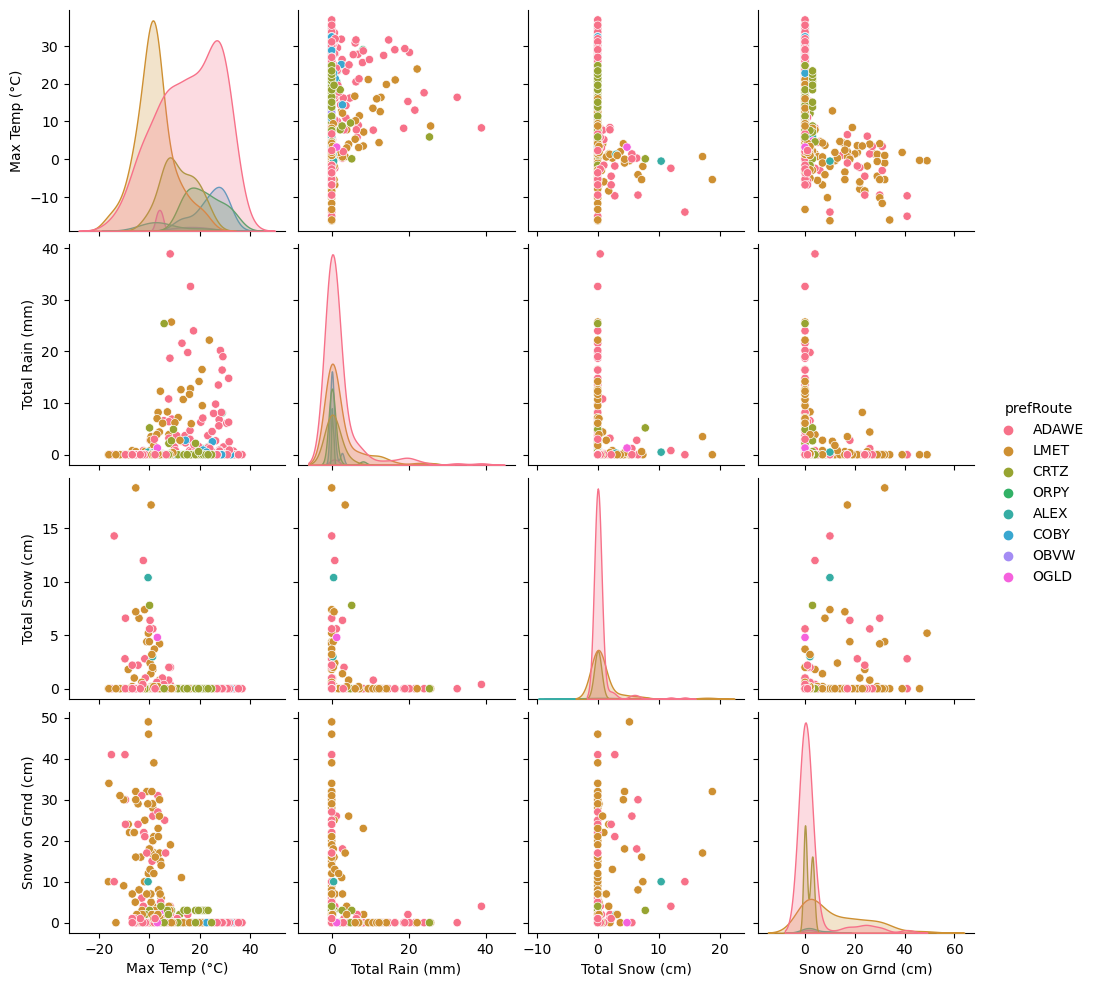

In [7]:
sns.pairplot(df,hue='prefRoute', vars=['Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)'])
#sns.countplot(x = 'prefRoute', data = df)

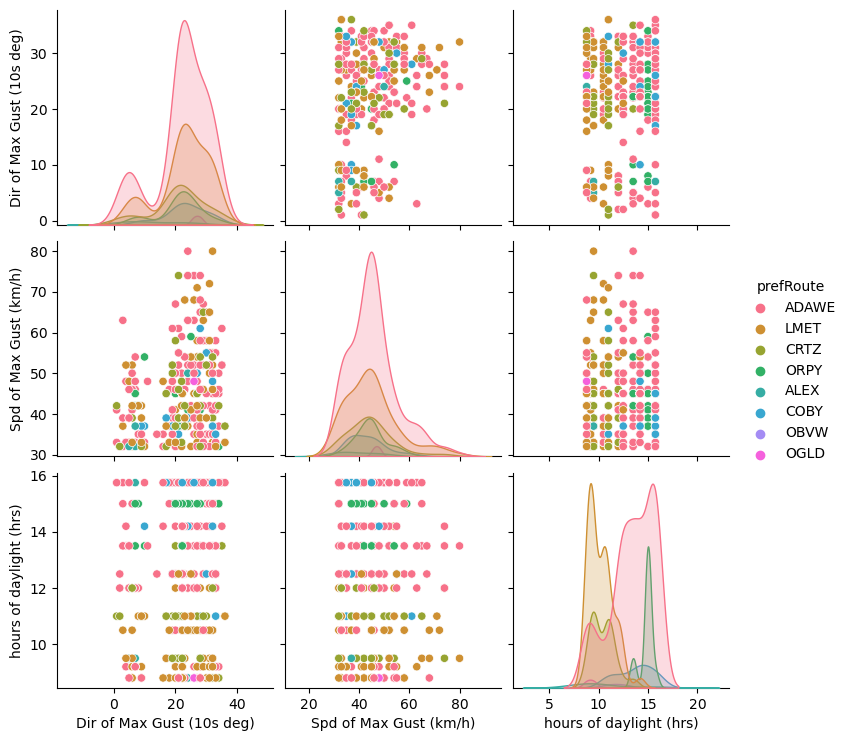

In [8]:
sns.pairplot(df,hue='prefRoute', vars=['Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)'])

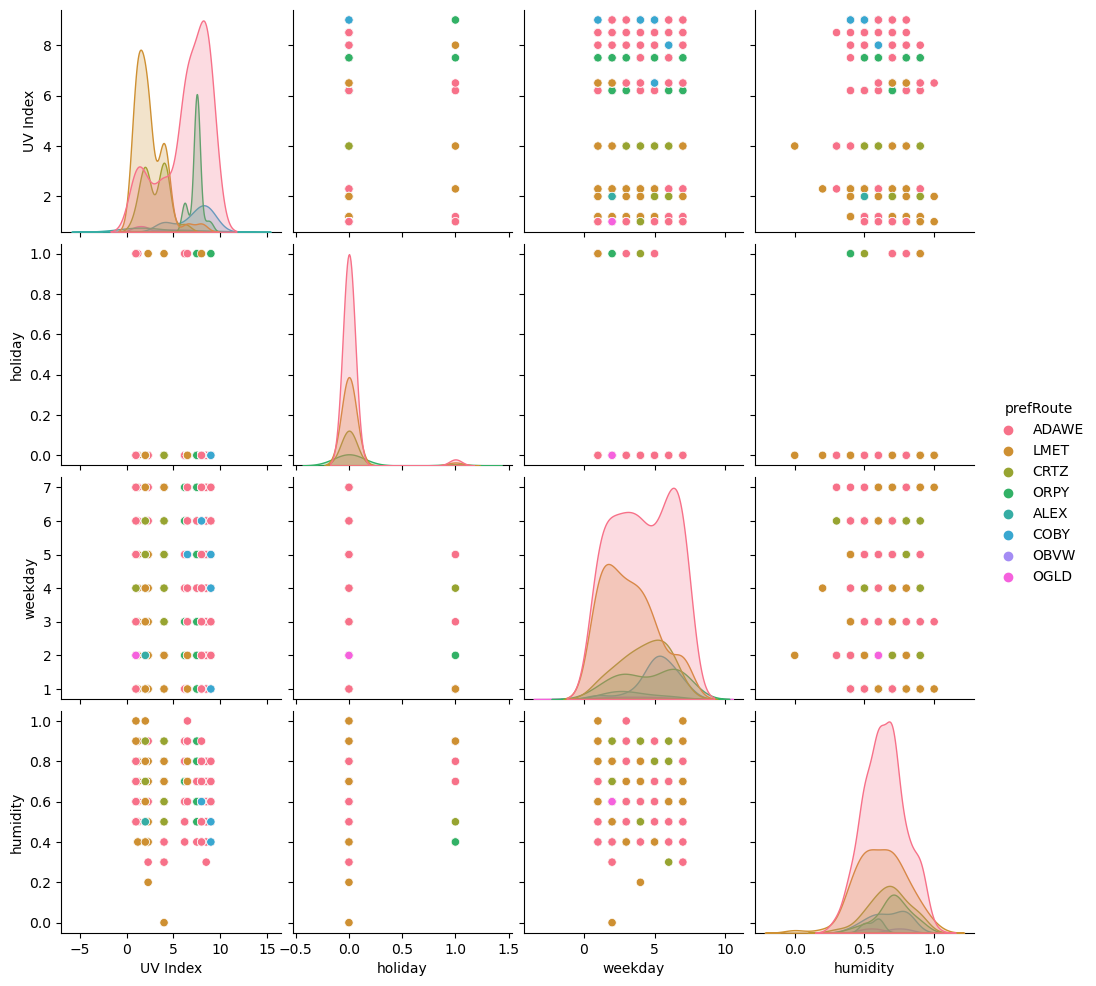

In [9]:
sns.pairplot(df,hue='prefRoute', vars=['UV Index','holiday', 'weekday', 'humidity'])


As noted in the previous notebooks of this tutorial, by looking at the result of pair plots' probability density functions, we can visualize more clearly what properties of the weather and calendar differentiate the bike routes in our dataset.  Keeping in mind that the dataset is heavily based on the ADAWE route, we notice that humidity, days of the week and whether it's a holiday do not differentiate the routes from one another.

Let's prepare the Random Forest classifier

### Random Forest classifier

To use the classifier, we have to create our training data and test data variables.

For the training data, we have<br>
    - X variables (model inputs): 'Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)','Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)','UV Index','holiday', 'weekday', 'humidity'<br>
    - Y variable (model ouput): prefRoute
    
For the test data, we have<br>
    - X variables (model inputs): 'Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)','Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)','UV Index','holiday', 'weekday', 'humidity'<br>
    - Y variable (model ouput): prefRoute
    
Our X variables are all the measurable weather and time properties.<br>
Our Y variable is the prefered route.<br>
Let's create those by removing the relevant columns.

In [10]:
X = df.drop(['prefRoute'],axis=1)
y = df['prefRoute']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df['prefRoute'], random_state=42)


In [12]:

clf=RandomForestClassifier(n_estimators=10)

Random Forest classifiers are made up a several decision trees on different chunks of data and vote on the answer to get more accurate predictions. The number of estimators represents to number of decision trees we want Random Forest to use for prediction.

Let's set up our first Random Forest classifer with the training variables from above: X_train and y_train.

This Random Forest classifier will have 10 estimators.

Next we fit the model to the training data.  fit is the same as train.

In [13]:
clf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10)

In [14]:
y_pred=clf.predict(X_test)
print("Accuracy:","{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.755


How does the accuracy compare to Linear Regression? Since the train/test split is made of randomly chosen rows and ADAWE route has double more data points than the next higher one,  the dataset can be considered shewed.  This means it is possible that we may not see an improvement in accuracy over Linear Regression classifier. This should not be surprising because of the imbalanced nature of the data.

Let's test the model by trying to predict the route taken with a given set of data in the predict array:


In [15]:
# Choose a route to test by un-commenting the line

#preferedRoute_index = clf.predict([[1.1,3.0,10.0,15,26.0,35,9.2,1.2,1,3,0.8]]) #Expect ADAWE
#preferedRoute_index = clf.predict([[-4.1,0,6.6,8,27,35,9.2,1.2,0,1,0.4]]) # Expect LMET
preferedRoute_index = clf.predict([[12.1,0,0,2,20,45,13.5,6.2,0,7,0.7]]) # Expect CRTZ

print(preferedRoute_index)

['CRTZ']


Did the route you chose to test come out correct?  It's important to keep in mind that random sub-sets are generated.  Based on the accuracy, there is still a significant chance that the predicted result could be wrong.  There's more we can do to try to improve that.

##### Feature Importance
Because of Random Forest's statistical nature, it is possible to evaluate the importance or weight each measurable property or feature of the iris flower.  Those features are the [Temp (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),hours of daylight (hrs),UV Index,holiday,weekday,humidity].  Feature importance is calculated by looking at how much worse a tree's accuracy would be without that feature during splitting.  More impactful features degrade performance more when omitted.  The process is repeated for all trees (estimators) in the forest, and an averaged measure of the deterioration in accuracy over all trees is assigned to each feature as its importance.
Let's have a look by plotting a bar chart of each feaure and their respective importance.

In [16]:

input_parameters = pd.Series(clf.feature_importances_,index=['Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)', 'UV Index','holiday', 'weekday', 'humidity']).sort_values(ascending=False)
                          
input_parameters.index

Index(['Max Temp (°C)', 'hours of daylight (hrs)', 'weekday', 'UV Index',
       'Snow on Grnd (cm)', 'Spd of Max Gust (km/h)',
       'Dir of Max Gust (10s deg)', 'humidity', 'Total Rain (mm)',
       'Total Snow (cm)', 'holiday'],
      dtype='object')

Let's look at the features in order of importance

Text(0, 0.5, 'Input Parameters')

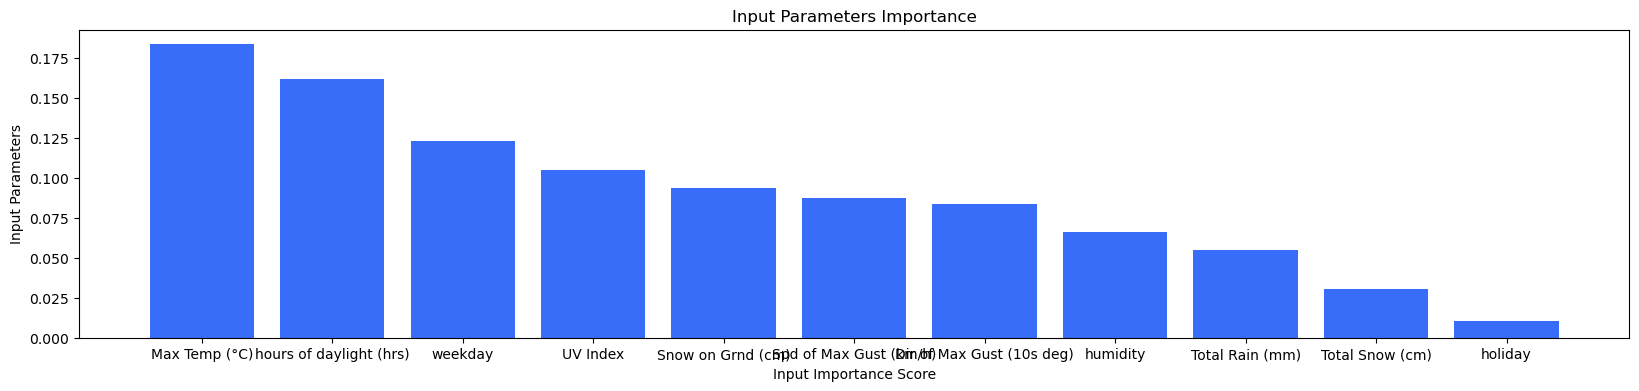

In [17]:
#import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 4]

plt.bar(input_parameters.index,input_parameters.values)
plt.title('Input Parameters Importance')
plt.xlabel('Input Importance Score')
plt.ylabel('Input Parameters')

We notice that the Total Snow and Holiday features have significantly less weight compared to others.  Let's get some metrics about importance.  The importance means the significance or influence of each feature in making predictions and is scaled from 0 to 1.  The larger numerical values mean a feature was used heavily by the model to make splits/decisions and has more predictive power.  The importances sum add up to 1.

In [18]:
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_list = df.columns.drop('prefRoute')
print(feature_list)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Index(['Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)', 'hours of daylight (hrs)', 'UV Index',
       'holiday', 'weekday', 'humidity'],
      dtype='object')
Variable: Max Temp (°C)        Importance: 0.18
Variable: hours of daylight (hrs) Importance: 0.16
Variable: weekday              Importance: 0.12
Variable: UV Index             Importance: 0.1
Variable: Snow on Grnd (cm)    Importance: 0.09
Variable: Spd of Max Gust (km/h) Importance: 0.09
Variable: Dir of Max Gust (10s deg) Importance: 0.08
Variable: humidity             Importance: 0.07
Variable: Total Rain (mm)      Importance: 0.05
Variable: Total Snow (cm)      Importance: 0.03
Variable: holiday              Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None]

We will next attempt to get the best model we can possibly get can from the Random Forest classifier.  We can choose to eliminate some of the lower importance features based on a certain criteria that we come up with.  For this tutorial, the criteria is to use the features that add up to 95% predictive weight.

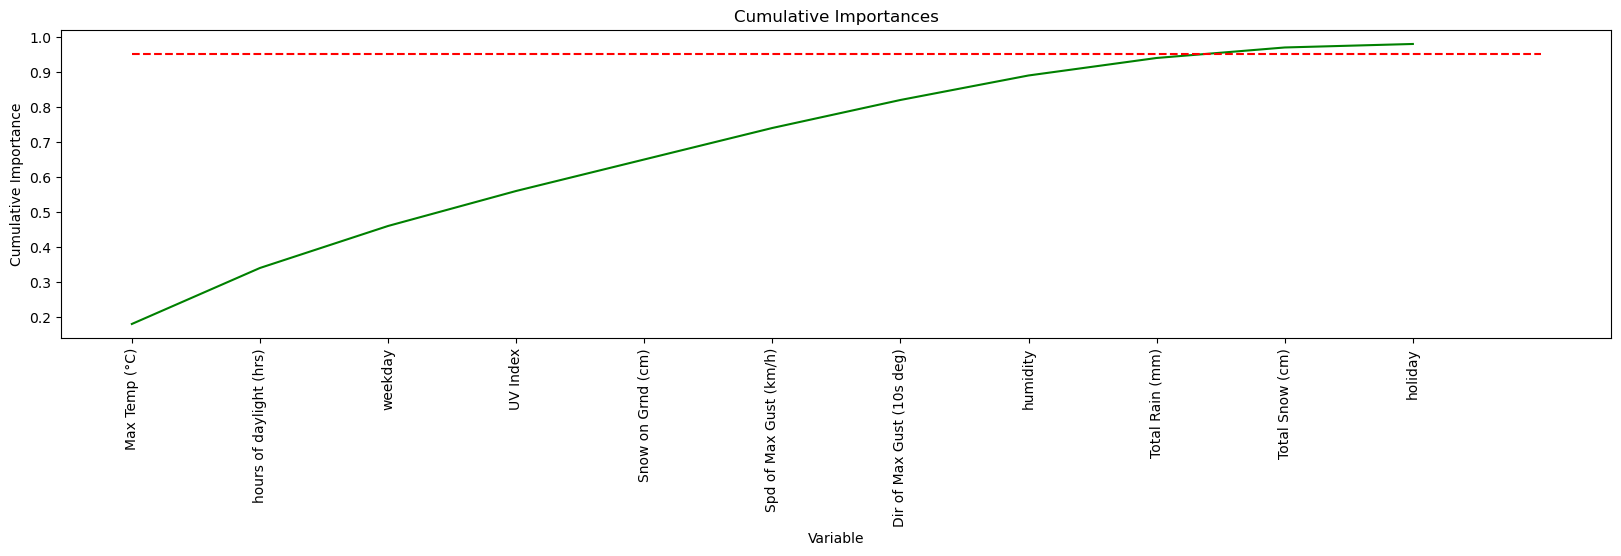

In [19]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');


Keeping the features that add up to 95% cumulative weight seems reasonable if we can get accuracy gain from it.  Let's try it.

In [20]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 10


The sorted_features variable in the cell above lists the features from most to least important. We then take the first 9 representing 95% predictive weight.

In [21]:
print()
print(sorted_features[:9])


['Max Temp (°C)', 'hours of daylight (hrs)', 'weekday', 'UV Index', 'Snow on Grnd (cm)', 'Spd of Max Gust (km/h)', 'Dir of Max Gust (10s deg)', 'humidity', 'Total Rain (mm)']


9 features give us 95% cumulative weight.  Let's rerun the model with those remaining 9 features.  To do that, we eliminate the last 2 columns of our dataset df which are 'Total Snow (cm)', 'holiday'.

In [22]:
# Need to set this up for Workshop

X = df.drop(['prefRoute', 'Total Snow (cm)', 'holiday'],axis=1)
y = df['prefRoute']

Train the classifier again with the new dataset.
First, set up the training and test sets using a 70% train / 30% test split.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df['prefRoute'], random_state=42)


First we build the model with a train/test split of 70/30.  

In [24]:

clf=RandomForestClassifier(n_estimators=10)

In [25]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

Run the prediction on the test set

In [26]:
y_pred=clf.predict(X_test)

Get accuracy and compare with the one above

In [27]:
print("Accuracy:","{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.700


Did you get an improvement from before remove least significant fetures? Most of the time, there will be a significant improvement. We know from our analysis in this workshop that this dataset is very unblanaced so it should be expected if there is a noticible variance in the outcome of the accuracy of the model model. 

Removing low importance features in a random forest can have the following effects:
- Improves model performance: Eliminating noisy, irrelevant or misleading features prevents them from negatively impacting individual decision trees. This can improve overall random forest accuracy.
- Reduces overfitting: Less features means less likelihood of overfitting to spurious patterns. Removal of unimportant features acts as a form of regularization.
- Speeds up computation: As the number of features decreases, so does the time to train and evaluate trees. Pruning features reduces complexity and increases efficiency.
- Enhances interpretability: Focusing on the most important features makes it easier to explain predictions and understand model behavior. The core signal is retained.
- May decrease model variance: Removing extraneous features may lower variance between individual trees, tightening predictions. But could also remove useful predictors.
- Risks losing information: Low importance may still contain some useful signal. Eliminating too aggressively may degrade model performance if important interactions exist.
The effect also depends on why a feature has low importance. It may be irrelevant or it may be redundant. Redundant features can likely be removed with a minimal impact on model accuracy. But irrelevant features should definitely be removed to improve the random forest.

**However, it should be noted that ...**

In some situations, removing low importance features can lower the accuracy of a random forest model:
- Highly correlated features: If two features are highly correlated, one may get rated as less important. But eliminating it removes useful signal.
- Small dataset size: With little data, importance scores are less reliable. Removing features deemed unimportant could remove useful predictors.
- Interactions with other features: A feature may not be directly predictive but could have interactions that contribute to accuracy. Its removal disables these interactions.
- Noise reduction: A feature with little signal may be acting as a noise filter that improves accuracy. Removing it eliminates this regularization effect.
- Target leakage: A feature unrelated to the target may leak signal from the target itself. Removing it eliminates this leakage which benefited accuracy.
- Simplistic importance metric: The importance metric used may not fully capture a feature's contribution. The tree structure matters.
- Capturing side effects: An unimportant feature may capture some secondary effects or proxies that contribute a bit to accuracy.
In general, if the low importance features exhibit any interactions, redundancies or hidden effects, removing too many of them could degrade the performance of the random forest model. A careful balance is needed.

**Next steps**<br>
It should be emphasized again that, as observed at the beginning of the tutorial, the dataset is heavily weighted to the ADAWE route. That route's data represents around 50% of the whole dataset.  With that we were able to achieve 72% model accuracy which is not bad considering this anomalie.  The next steps should be first to look for and trim away any features had may be highly correlated to others. We saw how to do that in Notebook 1 of this tutorial. The second step would be to get more data for the other routes or consider removing some routes altogether. The aim would be to get a more balanced distribution of data for the outcome we want to predict.